# Project Name: Bank Customer Churn Prediction using various ML techniques and Evaluating them

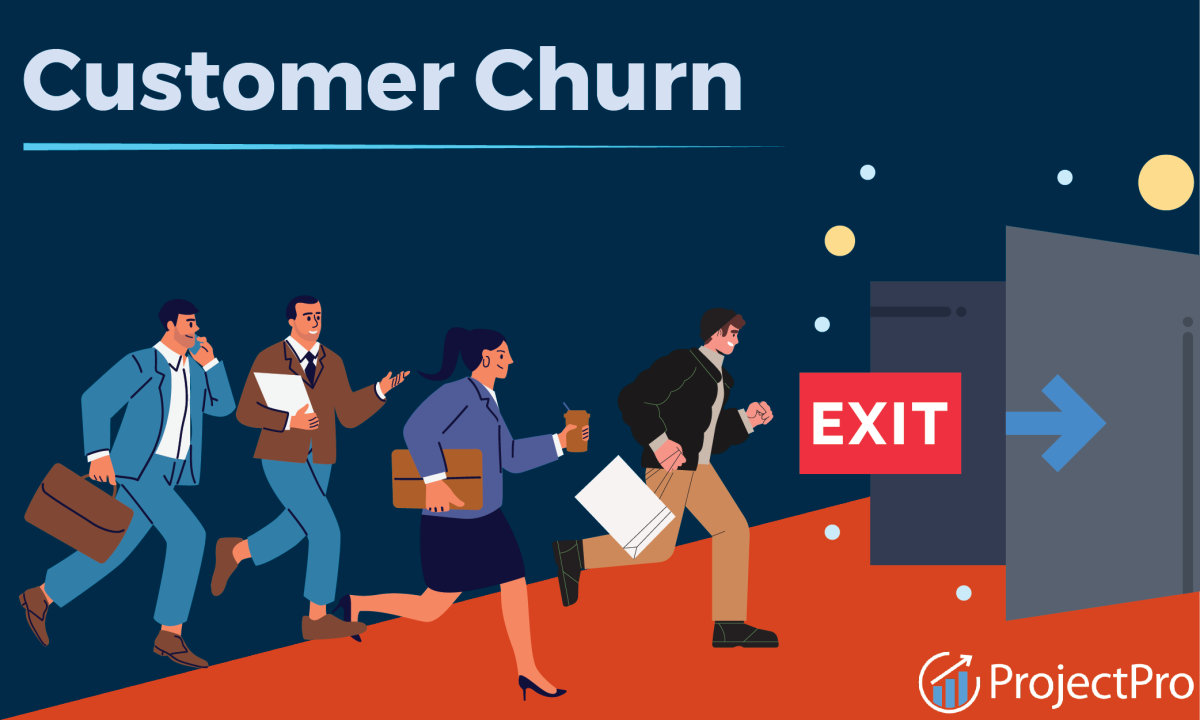

## Context:
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN
- Compare with various ML techniques like RandomForest and LightGBM

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/PortFolio/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


#Data Analysis

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


## We will plot a Pie Chart

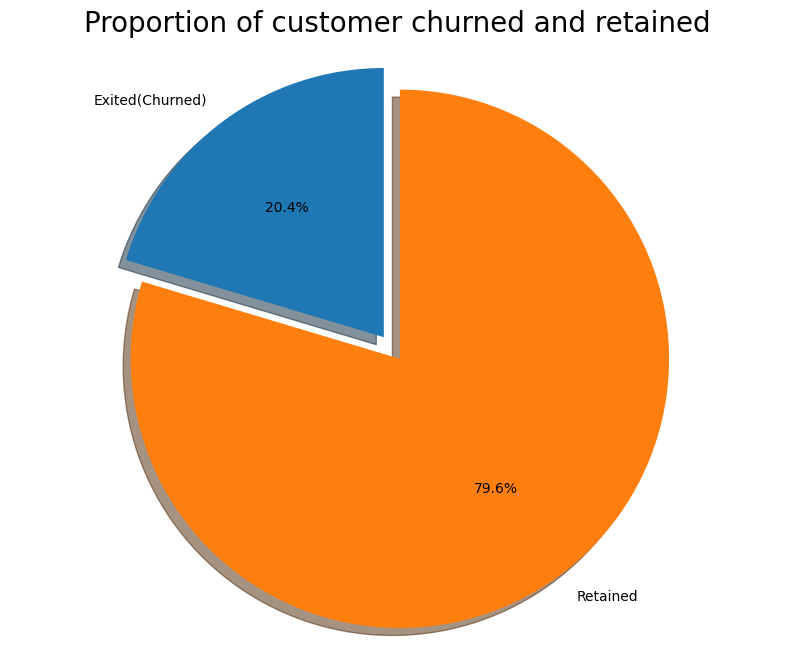

In [10]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [11]:
import seaborn as sns

<Axes: xlabel='IsActiveMember', ylabel='count'>

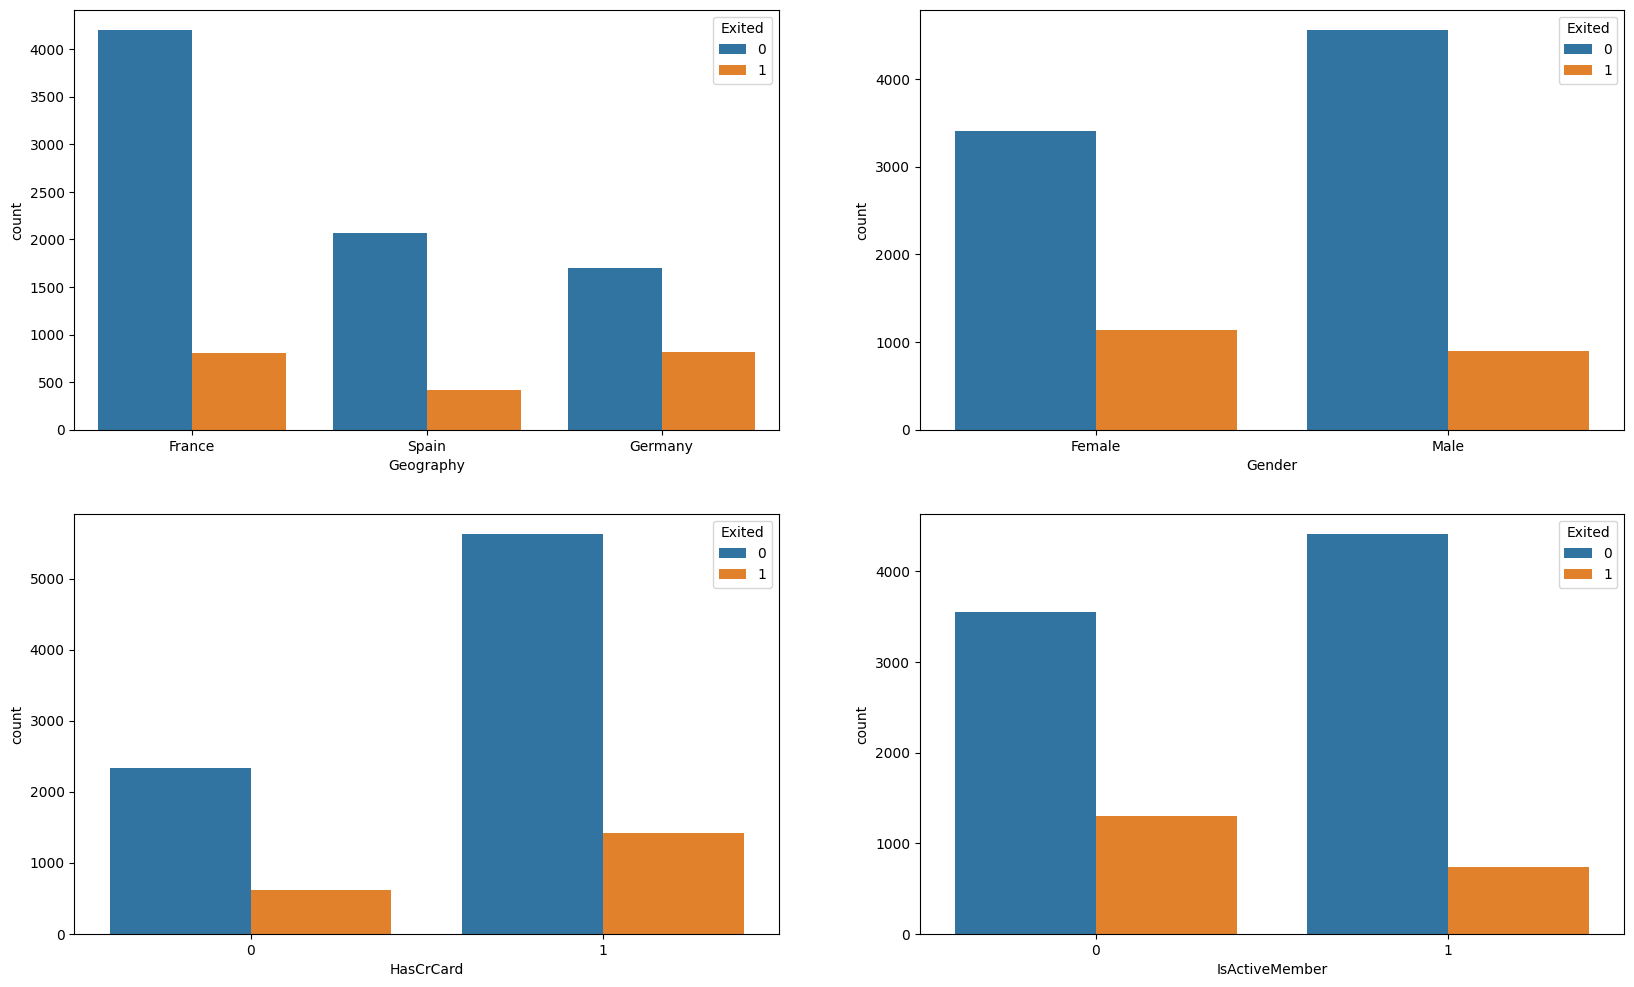

In [12]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

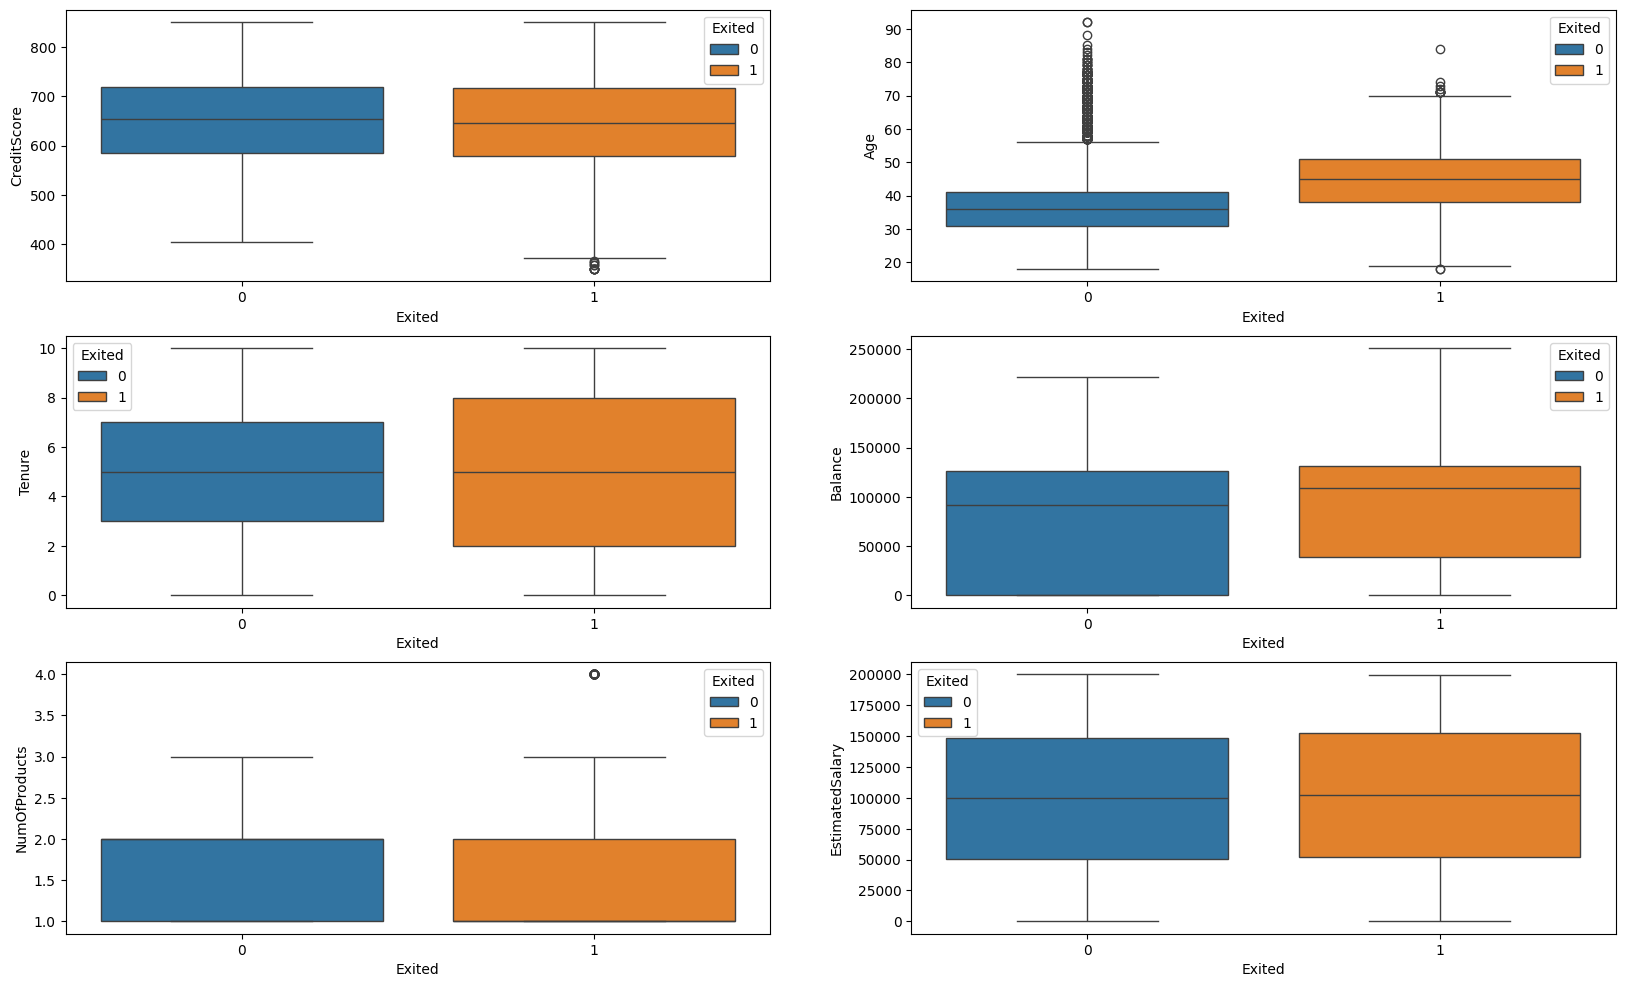

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

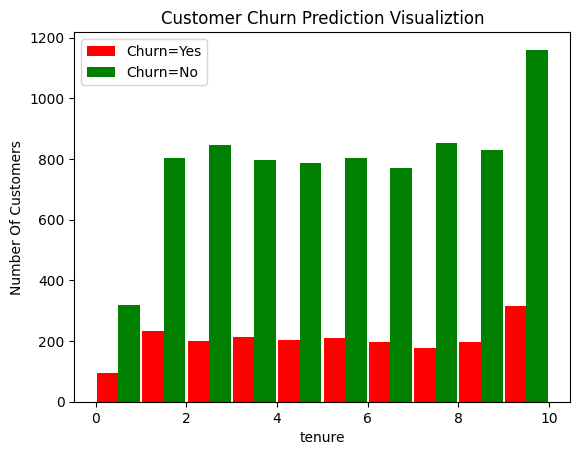

In [14]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

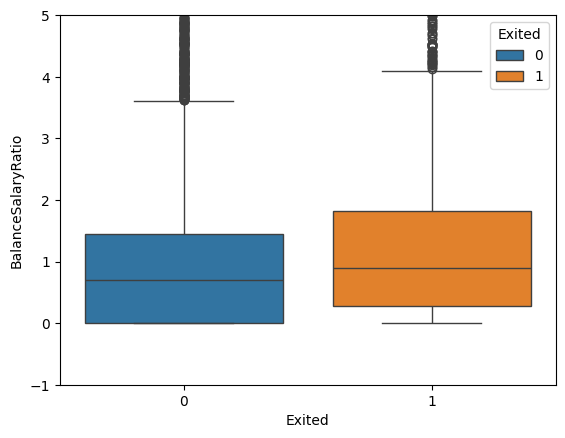

In [15]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

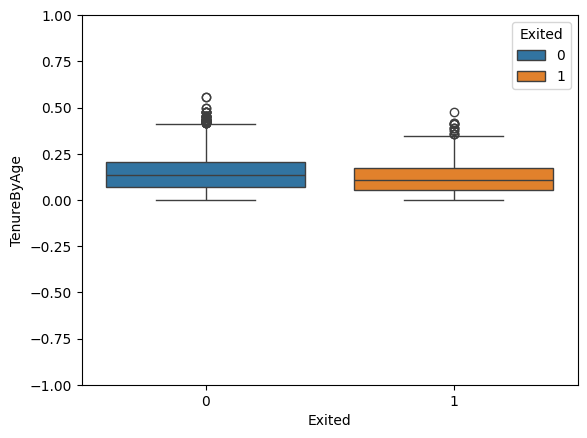

In [16]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables

In [17]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [18]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [19]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [20]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


In [21]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [22]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


In [23]:
# Dictionary to store model performance
model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [24]:
from sklearn.preprocessing import StandardScaler

# List of variables to scale (same as before)
scale_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create a copy of the original dataset for Logistic Regression
df_logistic = df.copy()
df_logistic = pd.get_dummies(data=df, columns=['Geography'])

# Apply StandardScaler
scaler_standard = StandardScaler()
df_logistic[scale_var] = scaler_standard.fit_transform(df_logistic[scale_var])

# Now, df_logistic has the features scaled using StandardScaler for Logistic Regression
X_logistic = df_logistic.drop('Exited', axis='columns')  # Independent features
y_logistic = df_logistic['Exited']  # Target variable




In [25]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=5)

# Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)

# Make predictions and evaluate
y_pred_log = log_model.predict(X_test_log)
accuracy_log = accuracy_score(y_test_log, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log:.4f}')

Logistic Regression Accuracy: 0.8090


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)

# Store the metrics for LightGBM
model_metrics['Model'].append('LogisticRegression ')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"LogisticRegression - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")



LogisticRegression - Precision: 0.5865, Recall: 0.1926, F1-Score: 0.2900, Accuracy: 0.8090


In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Assuming df1 is a DataFrame with your data
X = df1.drop('Exited', axis='columns').astype('float32')  # independent features as float32
y = df1['Exited'].astype('float32')  # dependent feature as float32

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# No need to expand dimensions
# X_train and X_test should retain their 2D shapes (samples, features)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(14,), activation='relu'),  # No batch size here
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5387 - loss: 0.8532
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4928
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4713
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.5395
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4791
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7991 - loss: 0.4519
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8115 - loss: 0.4409
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8011 - loss: 0.4927
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8115 - loss: 0.4283
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4445
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8112 - loss: 0.4615
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [28]:
model.evaluate(X_test, y_test)
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8480 - loss: 0.3653
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03584006],
       [0.04773593],
       [0.04016929],
       [0.09112014],
       [0.05461485]], dtype=float32)

In [29]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 0, 0]

In [30]:
accuracy_seq = accuracy_score(y_test,y_pred)
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  84.8 %


In [31]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for SequentialNN
model_metrics['Model'].append('SequentialNN')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"SequentialNN - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

SequentialNN - Precision: 0.7244, Recall: 0.4025, F1-Score: 0.5175, Accuracy: 0.8480


Text(95.72222222222221, 0.5, 'Truth')

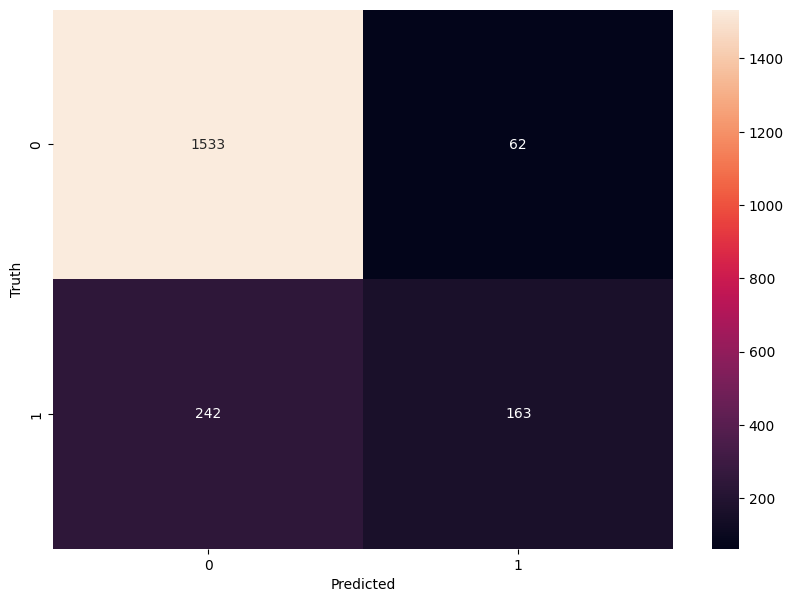

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('LightGBM')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"LightGBM - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

LightGBM - Precision: 0.7244, Recall: 0.4025, F1-Score: 0.5175, Accuracy: 0.8480


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf:.4f}')




Accuracy: 0.8560


In [35]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('RandomForest')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"RandomForest- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

RandomForest- Precision: 0.7489, Recall: 0.4346, F1-Score: 0.5500, Accuracy: 0.8560


Random Forest is also very interpretable. We can observe Age is the most important feature, thus predictive for a customer to get exited.

Interesting read on Forest Classifiers on Medium:


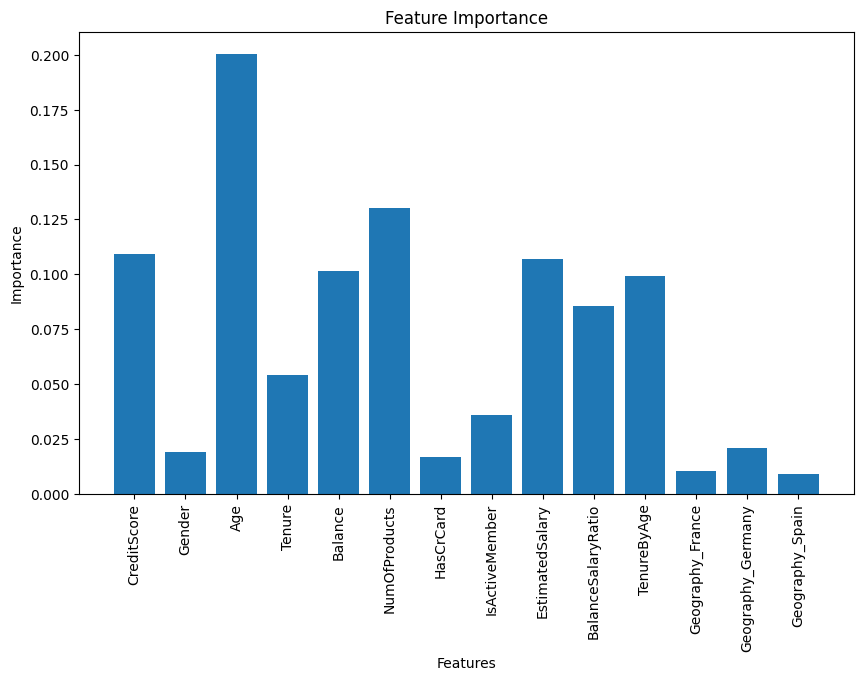

Age: 0.2004
NumOfProducts: 0.1301
CreditScore: 0.1093
EstimatedSalary: 0.1071
Balance: 0.1015
TenureByAge: 0.0991
BalanceSalaryRatio: 0.0858
Tenure: 0.0543
IsActiveMember: 0.0361
Geography_Germany: 0.0208
Gender: 0.0190
HasCrCard: 0.0167
Geography_France: 0.0105
Geography_Spain: 0.0093


In [36]:
# Get feature importance
importances = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Sort and display feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=5)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy_df = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy_df:.4f}')


Decision Tree Accuracy: 0.7985


In [38]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('DecisionTree')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"DecisionTree- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

DecisionTree- Precision: 0.5023, Recall: 0.5284, F1-Score: 0.5150, Accuracy: 0.7985


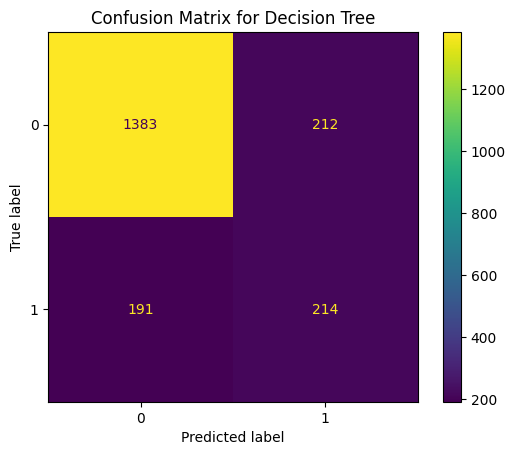

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for LightGBM (but you can apply this to any model)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()


In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=5)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
accuracy_abc = accuracy_score(y_test, y_pred)
print(f'AdaBoost Accuracy: {accuracy_abc:.4f}')


AdaBoost Accuracy: 0.8465


In [41]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('AdaBoostClassifier')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"AdaBoostClassifier - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

AdaBoostClassifier - Precision: 0.6885, Recall: 0.4420, F1-Score: 0.5383, Accuracy: 0.8465


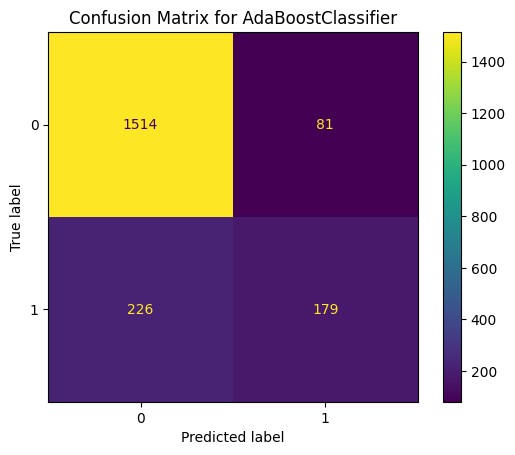

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for LightGBM (but you can apply this to any model)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for AdaBoostClassifier")
plt.show()


In [43]:
!pip install catboost


In [44]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, random_seed=5, verbose=0)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
accuracy_cbc = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy_cbc:.4f}')


CatBoost Accuracy: 0.8495


In [45]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('CatBoost')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"CatBoost- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

CatBoost- Precision: 0.6898, Recall: 0.4667, F1-Score: 0.5567, Accuracy: 0.8495


In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)  # Increase to 1000 or more
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy_log= accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_log:.4f}')



Accuracy: 0.8080


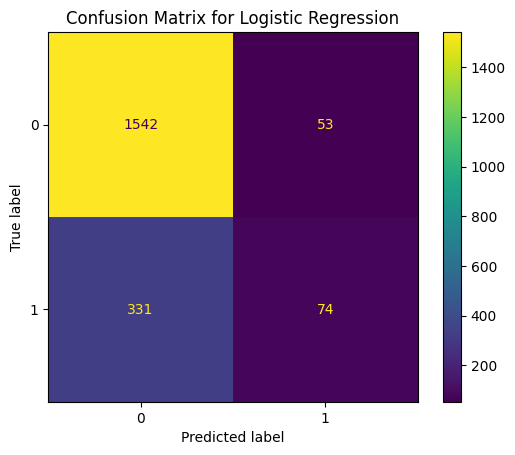

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for LightGBM (but you can apply this to any model)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [48]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
accuracy_la = accuracy_score(y_test, y_pred)
print(f'LightGBM Accuracy: {accuracy_la:.4f}')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 1632, number of negative: 6368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1359
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204000 -> initscore=-1.361479
[LightGBM] [Info] Start training from score -1.361479
LightGBM Accuracy: 0.8560


In [49]:
# Example for LightGBM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the metrics for LightGBM
model_metrics['Model'].append('LightGBM')
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1-Score'].append(f1)

# Print metrics
print(f"LightGBM - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

LightGBM - Precision: 0.7259, Recall: 0.4642, F1-Score: 0.5663, Accuracy: 0.8560


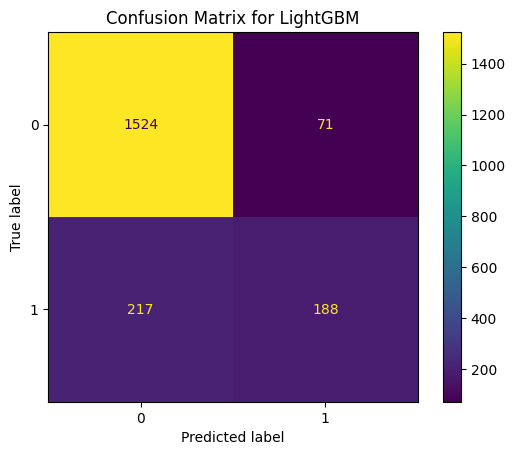

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for LightGBM (but you can apply this to any model)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for LightGBM")
plt.show()


## Model Building and Prediction

## The Sequential model

### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## Compare the results of different ML techniques



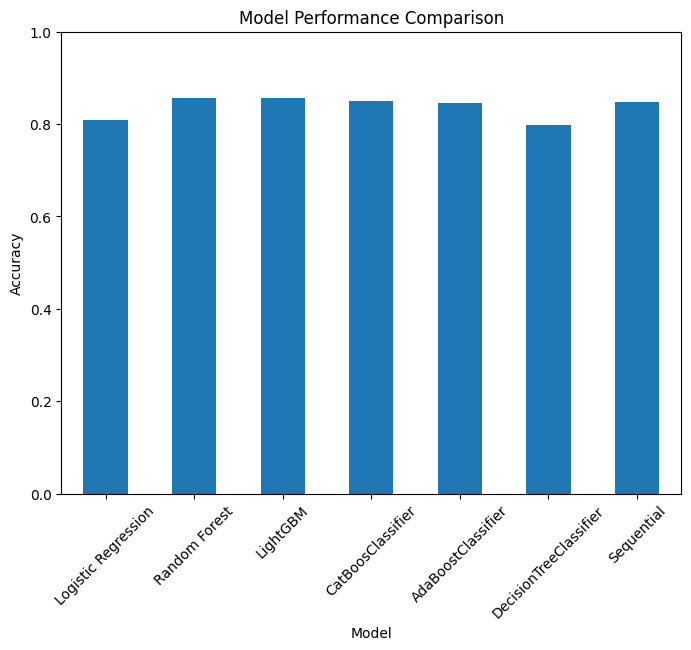

In [51]:
# Initialize a list to store model names and accuracies
model_performance = []

# Append the model name and accuracy after each model
model_performance.append(('Logistic Regression', accuracy_log))
model_performance.append(('Random Forest', accuracy_rf))
model_performance.append(('LightGBM', accuracy_la))
model_performance.append(('CatBoosClassifier', accuracy_cbc))
model_performance.append(('AdaBoostClassifier', accuracy_abc))
model_performance.append(('DecisionTreeClassifier', accuracy_df))
model_performance.append(('Sequential', accuracy_seq))

# At the end, visualize the performances
import pandas as pd
performance_df = pd.DataFrame(model_performance, columns=['Model', 'Accuracy'])

# Plotting the performances
performance_df.set_index('Model').plot(kind='bar', figsize=(8, 6), legend=False)
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()

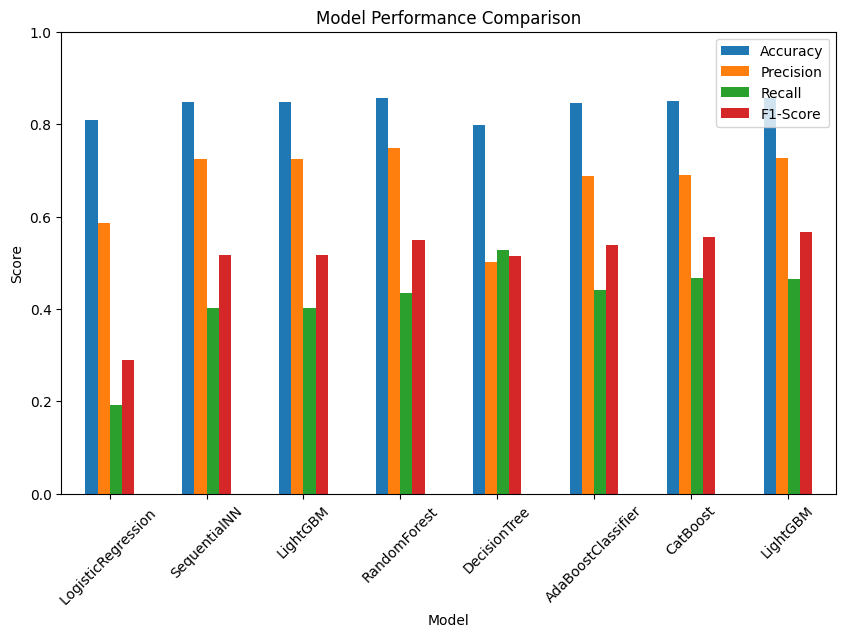

In [52]:
# Convert the dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(model_metrics)

# Plot Accuracy, Precision, Recall, and F1-Score for each model
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Because the metrics are between 0 and 1
plt.show()

In [53]:
# Calculate the average of all metrics for each model
metrics_df['Average'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean(axis=1)

# Print the dataframe with average scores
print(metrics_df)

# Find the model with the highest average
best_model = metrics_df.loc[metrics_df['Average'].idxmax()]
print(f"The best model is: {best_model['Model']} with an average score of {best_model['Average']:.4f}")


                 Model  Accuracy  Precision    Recall  F1-Score   Average
0  LogisticRegression     0.8090   0.586466  0.192593  0.289963  0.469505
1         SequentialNN    0.8480   0.724444  0.402469  0.517460  0.623093
2             LightGBM    0.8480   0.724444  0.402469  0.517460  0.623093
3         RandomForest    0.8560   0.748936  0.434568  0.550000  0.647376
4         DecisionTree    0.7985   0.502347  0.528395  0.515042  0.586071
5   AdaBoostClassifier    0.8465   0.688462  0.441975  0.538346  0.628821
6             CatBoost    0.8495   0.689781  0.466667  0.556701  0.640662
7             LightGBM    0.8560   0.725869  0.464198  0.566265  0.653083
The best model is: LightGBM with an average score of 0.6531


#Conclusion
In this project, we identified that the **LightGBM** model performed the best for predicting customer churn, with an average score of 0.6531 across key metrics such as accuracy, precision, recall, and F1-score. These metrics indicate that LightGBM offers a well-balanced performance for our task, effectively predicting whether a customer will leave or stay.

We predicted customer churn by analyzing various customer features, such as credit score, balance, tenure, and the number of products. By predicting churn, we aim to identify customers who are at risk of leaving, which is critical for retention strategies. Churn, in this context, refers to the likelihood that a customer will exit the service. We believe that preventing churn is important because retaining existing customers is often more cost-effective than acquiring new ones.

Given the dataset's imbalance (with fewer customers churning than staying), we found that the F1-score was particularly important in assessing model performance. LightGBM excelled in this area, handling the imbalance effectively and offering a good trade-off between precision and recall.

In conclusion, we found that LightGBM is a robust model for predicting churn, providing valuable insights that can be used to take proactive measures to reduce customer attrition.